# **Preentrega Proyecto Final: Análisis de Datos en el Mercado Aeronáutico**

## **Título del Proyecto: Análisis y Visualización de Datos en el Mercado Aeronáutico.**

---

#### **Abstracto y Motivación**
Este análisis explora la composición y características de aeronaves comerciales a nivel mundial, utilizando datos obtenidos mediante una API pública de aviación.

El objetivo es comprender las tendencias de flota, edad promedio por modelo y tecnologías de propulsión más utilizadas.  

---

#### **Audiencia**
- Fabricantes y operadores aeronáuticos.  
- Analistas del mercado aeronáutico y de mantenimiento.  
- Instituciones académicas e ingenieros interesados en la industria del transporte aéreo.

---

#### **Datos de Entrega**
*   Docente: Joaquin Salas.

*   Tutor: Federico Gravina.

*   Alumno: Esteban Tomás Sanabria.

*   Fecha Preentrega: 21/10/2025.

---

# **1 - Introducción del Proyecto:**


El presente proyecto tiene como objetivo explorar y analizar un conjunto de datos provenientes de una API pública de aviación, que proporciona información técnica y operativa de aeronaves registradas a nivel mundial.  

La fuente de datos incluye atributos clave tales como el modelo, línea de producción, número de motores, tipo de propulsión, edad promedio de la aeronave, estado operativo, fecha de entrega y propietario.  

Mediante el uso del lenguaje Python y bibliotecas como Pandas, Seaborn y Matplotlib, se desarrolla un análisis exploratorio orientado a identificar tendencias, patrones y relaciones dentro del parque aeronáutico global.

El propósito central es transformar datos crudos obtenidos por la API en insights significativos sobre la evolución tecnológica, la antigüedad promedio de la flota y la distribución de los principales modelos comerciales.

Este estudio permite a fabricantes, operadores y analistas del sector aeronáutico comprender la dinámica de la flota mundial, detectar oportunidades de renovación tecnológica y optimizar decisiones relacionadas con mantenimiento, inversión y planificación operativa.

A lo largo del análisis se busca responder las siguientes preguntas de interés:

* ¿Cuáles son las líneas de producción más representadas en la flota global?  

* ¿Qué tipos de motor predominan en las aeronaves actuales?  

* ¿Cómo varía la edad promedio de las aeronaves según su modelo o fabricante?  

* ¿Se observa una tendencia de renovación de flota en los últimos años?  

* ¿Existen diferencias en el estado operativo de las aeronaves según su línea de producción?

* ¿Cómo ha evolucionado la entrega de aeronaves a lo largo del tiempo?  

En etapas posteriores, este análisis podrá complementarse con modelos de Machine Learning orientados a la predicción de la vida útil o edad operativa de una aeronave a partir de sus características técnicas y de fabricación.

# **2 - Importación de Librerias:**

In [2]:
# ==============================================================
# 2 - Importación de Librerías
# ==============================================================
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings



# **3 - Carga de Datos desde API AviationStack:**

Los datos fueron obtenidos mediante una API pública del sector aeronáutico, que proporciona información técnica y de registro de aeronaves a nivel mundial. Posteriormente, se almacenaron en formato CSV para su análisis local, garantizando reproducibilidad y facilidad de manipulación en Python.


In [3]:
# ==============================================================
# 3 -  Obtener datos desde API AviationStack
# ==============================================================
API_KEY = "8583ba7525944d6d990eaa14e4c58b12"  # https://aviationstack.com
url = f"http://api.aviationstack.com/v1/airplanes?access_key={API_KEY}"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['data'])
df.to_csv("aviationstack_airplanes.csv", index=False)
df.head()

,id,iata_type,airplane_id,airline_iata_code,iata_code_long,iata_code_short,airline_icao_code,construction_number,delivery_date,engines_count,...,test_registration_number,plane_age,plane_class,model_name,plane_owner,plane_series,plane_status,production_line,registration_date,rollout_date
0,9776641,B737-300,1,0B,B733,733,None,23653,1986-08-21T22:00:00.000Z,2,...,None,31,None,737,Airwork Flight Operations Ltd,377,active,Boeing 737 Classic,0000-00-00,None
1,9776642,B737-400,2,0B,B734,734,None,28723,1997-05-29T22:00:00.000Z,2,...,None,20,None,737,Monroe Aircraft Ireland Ltd,46N,active,Boeing 737 Classic,2007-12-20T23:00:00.000Z,None
2,9776643,B737-300,3,0B,B733,733,None,24453,1989-06-19T22:00:00.000Z,2,...,None,28,None,737,MSN 24453 Ltd,322,active,Boeing 737 Classic,2008-05-22T22:00:00.000Z,None
3,9776644,B737-500,4,0B,B735,735,None,24778,1990-04-05T22:00:00.000Z,2,...,None,27,None,737,ORIX Aviation Systems Ltd,5L9,active,Boeing 737 Classic,2009-07-13T22:00:00.000Z,None
4,9776645,B737-400,5,0B,B734,734,None,27002,1992-07-15T22:00:00.000Z,2,...,None,25,None,737,None,430,active,Boeing 737 Classic,2010-12-21T23:00:00.000Z,None


# **4 - Limpieza de Datos:**

A partir del análisis del atributo df.info(), se observó que la mayoría de las columnas del dataset proveniente de la API aeronáutica se encontraban en formato object.

Por este motivo, se llevó a cabo un proceso de limpieza y transformación de datos con el objetivo de asegurar la correcta tipificación de las variables y la consistencia de los registros, permitiendo así un análisis estadístico y una visualización más precisa de los resultados.

Durante esta etapa se aplicaron las siguientes acciones:


1. **Eliminación de valores nulos:** Se eliminaron las filas que no contenían información sobre la línea de producción (production_line), por considerarse un campo esencial para el análisis comparativo entre modelos y fabricantes.

2. **Estandarización de nombres de columnas:** Se renombraron varias columnas para mejorar la legibilidad y coherencia con el dominio aeronáutico, utilizando una convención uniforme en español.

3. **Conversión de tipos de datos:** Se convirtieron las columnas con valores numéricos, como edad de la aeronave o cantidad de motores, a tipo float, mientras que las fechas se transformaron a tipo datetime para habilitar análisis temporales. Las variables categóricas y de texto se mantuvieron como str, aplicando una normalización básica para eliminar valores nulos, espacios y formatos inconsistentes.

4. **Detección y eliminación de duplicados:** Se eliminaron registros duplicados basados en los campos matrícula y número de serie, asegurando la unicidad de las aeronaves dentro del dataset.

5. **Verificación final del tipo de datos:** Posteriormente, se corroboró que las columnas relevantes respetaran los siguientes tipos de datos y descripciones:

| Campo                 | Tipo de dato | Descripción                                            |
| --------------------- | ------------ | ------------------------------------------------------ |
| id_aeronave           | str          | Identificador único del registro                       |
| tipo_iata             | str          | Código IATA del tipo de aeronave                       |
| id_modelo             | str          | Identificador interno del modelo                       |
| codigo_aerolinea_iata | str          | Código IATA de la aerolínea operadora                  |
| codigo_aerolinea_icao | str          | Código ICAO de la aerolínea                            |
| numero_serie          | str          | Número de serie o construcción                         |
| fecha_entrega         | datetime64   | Fecha de entrega de la aeronave                        |
| cantidad_motores      | float        | Número de motores                                      |
| tipo_motor            | str          | Tipo de propulsión (TURBOFAN, TURBOPROP, etc.)         |
| fecha_primer_vuelo    | datetime64   | Fecha de primer vuelo (si disponible)                  |
| codigo_hex            | str          | Código hexadecimal ICAO                                |
| modelo                | str          | Nombre del modelo (ej. 737-800, A320neo)               |
| propietario           | str          | Dueño o entidad operadora                              |
| estado_aeronave       | str          | Estado operativo (activo, almacenado, retirado)        |
| linea_produccion      | str          | Serie de producción (Boeing 737 NG, A320 Family, etc.) |
| edad_aeronave         | float        | Edad estimada de la aeronave                           |
| fecha_registro        | datetime64   | Fecha de registro del avión                            |
| fecha_rollout         | datetime64   | Fecha de salida de línea de producción                 |


In [4]:
# ==============================================================
# 4 - Limpieza de Datos
# ==============================================================

def limpiar_datos_aeronauticos(df):
    """
    Realiza la limpieza completa y transformación de datos aeronáuticos

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame raw obtenido de la API AviationStack

    Retorna:
    --------
    pandas.DataFrame
        DataFrame limpio y transformado listo para análisis
    """

    # ==============================================================
    # PASO 1: DIAGNÓSTICO INICIAL - Evaluar estado original de los datos
    # ==============================================================
    print("=== INFORMACIÓN INICIAL DEL DATAFRAME ===")
    print("• Evaluando estructura y calidad inicial de los datos...")
    df.info()
    print(f"\n• Filas totales: {len(df)}")
    print(f"• Columnas disponibles: {len(df.columns)}")
    print(f"• Lista de columnas: {list(df.columns)}")

    # ==============================================================
    # PASO 2: ESTANDARIZACIÓN DE NOMBRES - Traducir y normalizar nombres de columnas
    # ==============================================================
    print("\n" + "="*50)
    print("RENOMBRANDO COLUMNAS")
    print("="*50)
    print("• Traduciendo nombres al español y estandarizando terminología aeronáutica...")

    # Diccionario de mapeo: inglés -> español
    mapeo_columnas = {
        # Identificadores únicos
        'id': 'id_aeronave',
        'airplane_id': 'id_modelo',

        # Códigos IATA/ICAO
        'iata_type': 'tipo_iata',
        'airline_iata_code': 'codigo_aerolinea_iata',
        'iata_code_long': 'codigo_iata_largo',
        'iata_code_short': 'codigo_iata_corto',
        'airline_icao_code': 'codigo_aerolinea_icao',
        'icao_code_hex': 'codigo_hex',

        # Información de fabricación
        'construction_number': 'numero_serie',
        'line_number': 'numero_linea',
        'model_code': 'codigo_modelo',
        'model_name': 'modelo',
        'production_line': 'linea_produccion',

        # Fechas importantes
        'delivery_date': 'fecha_entrega',
        'first_flight_date': 'fecha_primer_vuelo',
        'registration_date': 'fecha_registro',
        'rollout_date': 'fecha_rollout',

        # Especificaciones técnicas
        'engines_count': 'cantidad_motores',
        'engines_type': 'tipo_motor',
        'plane_age': 'edad_aeronave',
        'plane_class': 'clase_aeronave',
        'plane_series': 'serie_aeronave',

        # Información operacional
        'registration_number': 'matricula',
        'test_registration_number': 'matricula_prueba',
        'plane_owner': 'propietario',
        'plane_status': 'estado_aeronave'
    }

    df = df.rename(columns=mapeo_columnas)
    print(f"✓ Renombradas {len(mapeo_columnas)} columnas")

    # ==============================================================
    # PASO 3: FILTRADO DE DATOS - Eliminar registros incompletos o irrelevantes
    # ==============================================================
    print("\n" + "="*50)
    print("FILTRADO DE DATOS INCOMPLETOS")
    print("="*50)

    # Definir campos críticos para el análisis
    campos_criticos = ['linea_produccion', 'modelo', 'matricula']
    filas_antes = len(df)

    print(f"• Filtrando registros sin datos en campos críticos: {campos_criticos}")
    print(f"• Registros antes del filtrado: {filas_antes}")

    # Eliminar filas donde alguno de los campos críticos sea nulo
    df = df.dropna(subset=campos_criticos, how='any')

    filas_despues = len(df)
    filas_eliminadas = filas_antes - filas_despues
    print(f"✓ Registros después del filtrado: {filas_despues}")
    print(f"✓ Registros eliminados: {filas_eliminadas} ({filas_eliminadas/filas_antes*100:.1f}%)")

    # ==============================================================
    # PASO 4: TRANSFORMACIÓN DE TIPOS DE DATOS - Asegurar tipos correctos
    # ==============================================================
    print("\n" + "="*50)
    print("TRANSFORMACIÓN DE TIPOS DE DATOS")
    print("="*50)

    # --------------------------------------------------------------
    # 4.1 CONVERSIÓN DE VARIABLES NUMÉRICAS
    # --------------------------------------------------------------
    print("• Convirtiendo variables numéricas...")
    columnas_numericas = ['cantidad_motores', 'edad_aeronave', 'numero_linea']

    for columna in columnas_numericas:
        if columna in df.columns:
            valores_antes = df[columna].notna().sum()
            df[columna] = pd.to_numeric(df[columna], errors='coerce')
            valores_despues = df[columna].notna().sum()
            print(f"  ✓ {columna}: {valores_antes} → {valores_despues} valores válidos")

    # --------------------------------------------------------------
    # 4.2 CONVERSIÓN DE FECHAS
    # --------------------------------------------------------------
    print("• Convirtiendo variables de fecha...")
    columnas_fecha = ['fecha_entrega', 'fecha_primer_vuelo', 'fecha_registro', 'fecha_rollout']

    for columna in columnas_fecha:
        if columna in df.columns:
            valores_antes = df[columna].notna().sum()
            df[columna] = pd.to_datetime(df[columna], errors='coerce', utc=True)
            valores_despues = df[columna].notna().sum()
            print(f"  ✓ {columna}: {valores_antes} → {valores_despues} fechas válidas")

    # --------------------------------------------------------------
    # 4.3 NORMALIZACIÓN DE VARIABLES DE TEXTO
    # --------------------------------------------------------------
    print("• Normalizando variables de texto...")
    columnas_texto = [
        'id_aeronave', 'tipo_iata', 'id_modelo', 'codigo_aerolinea_iata',
        'codigo_iata_largo', 'codigo_iata_corto', 'codigo_aerolinea_icao',
        'numero_serie', 'codigo_hex', 'codigo_modelo', 'matricula',
        'matricula_prueba', 'clase_aeronave', 'modelo', 'propietario',
        'serie_aeronave', 'estado_aeronave', 'linea_produccion'
    ]

    for columna in columnas_texto:
        if columna in df.columns:
            # Convertir a string, eliminar espacios y reemplazar valores nulos
            df[columna] = (
                df[columna]
                .astype(str)
                .str.strip()
                .replace(['None', 'nan', 'NaT', 'NULL', ''], np.nan)
            )
    print(f"✓ Normalizadas {len(columnas_texto)} columnas de texto")

    # ==============================================================
    # PASO 5: NORMALIZACIÓN DE VALORES - Estandarizar formatos
    # ==============================================================
    print("\n" + "="*50)
    print("NORMALIZACIÓN DE VALORES")
    print("="*50)

    # Estado de aeronave en minúsculas para consistencia
    if 'estado_aeronave' in df.columns:
        df['estado_aeronave'] = df['estado_aeronave'].str.lower()
        print("✓ Estado de aeronave normalizado a minúsculas")

    # Tipo de motor en mayúsculas (estándar aeronáutico)
    if 'tipo_motor' in df.columns:
        df['tipo_motor'] = df['tipo_motor'].str.upper()
        print("✓ Tipo de motor normalizado a mayúsculas")

    # ==============================================================
    # PASO 6: ELIMINACIÓN DE DUPLICADOS - Garantizar unicidad de registros
    # ==============================================================
    print("\n" + "="*50)
    print("DETECCIÓN DE DUPLICADOS")
    print("="*50)

    # Buscar duplicados basados en identificadores únicos
    campos_unicos = ['matricula', 'numero_serie']
    duplicados = df.duplicated(subset=campos_unicos, keep='first').sum()

    print(f"• Duplicados detectados (basados en {campos_unicos}): {duplicados}")

    if duplicados > 0:
        df = df.drop_duplicates(subset=campos_unicos, keep='first')
        print(f"✓ {duplicados} registros duplicados eliminados")
    else:
        print("✓ No se encontraron registros duplicados")

    # ==============================================================
    # PASO 7: VALIDACIÓN Y LIMPIEZA DE VALORES EXTREMOS
    # ==============================================================
    print("\n" + "="*50)
    print("VALIDACIÓN DE VALORES EXTREMOS")
    print("="*50)

    # Validar y limpiar edad de aeronaves
    if 'edad_aeronave' in df.columns:
        filas_antes = len(df)

        # Asegurar tipo numérico
        df['edad_aeronave'] = pd.to_numeric(df['edad_aeronave'], errors='coerce')

        # Eliminar valores nulos en edad
        df = df[df['edad_aeronave'].notna()]
        filas_sin_nulos = len(df)

        # Filtrar valores extremos (aeronaves > 100 años consideradas erróneas)
        df = df[df['edad_aeronave'] < 100]
        filas_despues = len(df)

        print(f"• Validación de edad de aeronaves:")
        print(f"  - Registros antes: {filas_antes}")
        print(f"  - Sin valores nulos: {filas_sin_nulos}")
        print(f"  - Después de filtrar extremos (<100 años): {filas_despues}")
        print(f"  - Registros eliminados: {filas_antes - filas_despues}")

    # ==============================================================
    # PASO 8: VALIDACIÓN FINAL Y REPORTE
    # ==============================================================
    print("\n" + "="*50)
    print("VALIDACIÓN FINAL DEL DATAFRAME")
    print("="*50)

    print("=== ESTRUCTURA FINAL DEL DATAFRAME ===")
    df.info()

    print(f"\n=== RESUMEN DE LA LIMPIEZA ===")
    print(f"• Columnas finales: {len(df.columns)}")
    print(f"• Registros finales: {len(df)}")

    # Análisis de completitud por columna
    print(f"\n• COMPLETITUD POR COLUMNA (top 10 más completas):")
    completitud = (df.notna().sum() / len(df) * 100).sort_values(ascending=False)
    for col, perc in completitud.head(10).items():
        print(f"  {col:<25} {perc:6.1f}%")

    print("\n• MUESTRA DE DATOS LIMPIOS:")
    display(df.head(5))

    return df

# ==============================================================
# EJECUCIÓN DE LA LIMPIEZA
# ==============================================================
print("="*60)
print("🔧🔧🔧 INICIO DE PROCESO DE LIMPIEZA DE DATOS 🔧🔧🔧")
print("="*60)

# Ejecutar función de limpieza
df_limpio = limpiar_datos_aeronauticos(df)

print("\n" + "="*60)
print("✅✅✅ PROCESO DE LIMPIEZA COMPLETADO EXITOSAMENTE ✅✅✅")
print("="*60)

🔧🔧🔧 INICIO DE PROCESO DE LIMPIEZA DE DATOS 🔧🔧🔧
=== INFORMACIÓN INICIAL DEL DATAFRAME ===
• Evaluando estructura y calidad inicial de los datos...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        100 non-null    object
 1   iata_type                 100 non-null    object
 2   airplane_id               100 non-null    object
 3   airline_iata_code         100 non-null    object
 4   iata_code_long            100 non-null    object
 5   iata_code_short           100 non-null    object
 6   airline_icao_code         0 non-null      object
 7   construction_number       100 non-null    object
 8   delivery_date             99 non-null     object
 9   engines_count             100 non-null    object
 10  engines_type              100 non-null    object
 11  first_flight_date         96 non-null     o

/tmp/ipython-input-4189210118.py:133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[columna] = pd.to_datetime(df[columna], errors='coerce', utc=True)
/tmp/ipython-input-4189210118.py:156: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(['None', 'nan', 'NaT', 'NULL', ''], np.nan)


,id_aeronave,tipo_iata,id_modelo,codigo_aerolinea_iata,codigo_iata_largo,codigo_iata_corto,codigo_aerolinea_icao,numero_serie,fecha_entrega,cantidad_motores,...,matricula_prueba,edad_aeronave,clase_aeronave,modelo,propietario,serie_aeronave,estado_aeronave,linea_produccion,fecha_registro,fecha_rollout
0,9776641,B737-300,1,0B,B733,733,NaN,23653,1986-08-21 22:00:00+00:00,2,...,NaN,31.0,NaN,737,Airwork Flight Operations Ltd,377,active,Boeing 737 Classic,NaT,NaT
1,9776642,B737-400,2,0B,B734,734,NaN,28723,1997-05-29 22:00:00+00:00,2,...,NaN,20.0,NaN,737,Monroe Aircraft Ireland Ltd,46N,active,Boeing 737 Classic,2007-12-20 23:00:00+00:00,NaT
2,9776643,B737-300,3,0B,B733,733,NaN,24453,1989-06-19 22:00:00+00:00,2,...,NaN,28.0,NaN,737,MSN 24453 Ltd,322,active,Boeing 737 Classic,2008-05-22 22:00:00+00:00,NaT
3,9776644,B737-500,4,0B,B735,735,NaN,24778,1990-04-05 22:00:00+00:00,2,...,NaN,27.0,NaN,737,ORIX Aviation Systems Ltd,5L9,active,Boeing 737 Classic,2009-07-13 22:00:00+00:00,NaT
4,9776645,B737-400,5,0B,B734,734,NaN,27002,1992-07-15 22:00:00+00:00,2,...,NaN,25.0,NaN,737,NaN,430,active,Boeing 737 Classic,2010-12-21 23:00:00+00:00,NaT



✅✅✅ PROCESO DE LIMPIEZA COMPLETADO EXITOSAMENTE ✅✅✅


# **5 - Análisis Exploratorio de Datos (EDA)**


En esta sección se desarrolla un análisis descriptivo del dataset limpio, mediante herramientas estadísticas y visualizaciones.  

El objetivo es identificar patrones, tendencias y relaciones entre las variables que describen las aeronaves: antigüedad, línea de producción, tipo de motor y estado operativo.


## **5.1 - RESUMEN ESTADÍSTICO Y CALIDAD DE DATOS**

Este bloque de código realiza un análisis de la calidad y estructura del dataset aeronáutico. La función genera un reporte estructurado que evalúa:

1.   Información general (91 registros con 26 variables).

2.   Completitud de campos críticos (todos al 100%).

3.   Estadísticas numéricas (destacando una edad promedio de 19.9 años en aeronaves).

4.   Distribución de categorías.

Los resultados revelan un dataset con calidad aceptable (80.3% de completitud global) y excelente integridad en campos críticos (100%), donde predominan aeronaves con motores JET (61 vs 30 TURBOPROP) y configuraciones bimotor.

Por otro lado, la columna "codigo_aerolinea_icao" muestra problemas de completitud (0 registros válidos).

In [ ]:
# ==============================================================
# BLOQUE 1: RESUMEN ESTADÍSTICO Y CALIDAD DE DATOS
# ==============================================================

def analisis_calidad_datos_simple(df):
    """
    Función para explorar la calidad de datos de forma sencilla:
    - Ver cantidad de registros y columnas
    - Ver completitud de columnas importantes
    - Resumen de estadísticas numéricas
    - Resumen de variables categóricas
    """

    print("="*60)
    print("BLOQUE 1: RESUMEN DE DATOS")
    print("="*60)

    # 1. Información general
    print(f"\n1. INFORMACIÓN GENERAL:\n")
    print(f"Total de registros: {len(df):,}")
    print(f"Total de columnas: {len(df.columns)}\n")

    # 2️. Completitud columnas críticas
    print("-"*60)
    print("\n2. COMPLETITUD DE COLUMNAS CRÍTICAS:\n")
    columnas_criticas = ['matricula', 'linea_produccion', 'edad_aeronave',
                         'tipo_motor', 'estado_aeronave', 'cantidad_motores']
    print("Completitud columnas críticas:")
    for col in columnas_criticas:
        if col in df.columns:
            completitud = df[col].notna().mean() * 100
            print(f"  {col:<20}: {completitud:.1f}% completos | {df[col].nunique()} valores únicos")
        else:
            print(f"  {col:<20}: NO DISPONIBLE")

    # 3️. Estadísticas de columnas numéricas
    print("-"*60)
    print("\n3. ESTADÍSTICAS DE COLUMNAS NUMÉRICAS:\n")
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        print("\nEstadísticas de columnas numéricas:")
        print(df[num_cols].describe().round(2))
    else:
        print("\nNo hay columnas numéricas")

    # 4️. Resumen de columnas categóricas
    print("-"*60)
    print("\n4. RESUMEN DE COLUMNAS CATEGÓRICAS:")
    cat_cols = ['linea_produccion', 'tipo_motor', 'estado_aeronave']
    for col in cat_cols:
        if col in df.columns:
            print(f"\nDistribución de {col}:")
            print(df[col].value_counts().head(5))  # muestra las 5 más comunes
            if df[col].nunique() > 5:
                print(f"... y {df[col].nunique() - 5} más categorías")

    # 5️. Calidad general
    print("")
    print("-"*60)
    print("\n5. CALIDAD GENERAL DEL DATASET:\n")
    completitud_global = df.notna().mean().mean() * 100
    registros_completos = df[columnas_criticas].notna().all(axis=1).mean() * 100
    print(f"Completitud global: {completitud_global:.1f}%")
    print(f"Registros completamente limpios (columnas críticas): {registros_completos:.1f}%")
    print("")
    print("-"*60)
    return {
        'completitud_global': completitud_global,
        'registros_completos': registros_completos,
        'columnas_numericas': list(num_cols),
        'estructura_dataset': df.shape
    }

# EJECUTAR BLOQUE 1
resultados_bloque1 = analisis_calidad_datos_simple(df_limpio)


BLOQUE 1: RESUMEN DE DATOS

1. INFORMACIÓN GENERAL:

Total de registros: 91
Total de columnas: 26

------------------------------------------------------------

2. COMPLETITUD DE COLUMNAS CRÍTICAS:

Completitud columnas críticas:
  matricula           : 100.0% completos | 91 valores únicos
  linea_produccion    : 100.0% completos | 17 valores únicos
  edad_aeronave       : 100.0% completos | 24 valores únicos
  tipo_motor          : 100.0% completos | 2 valores únicos
  estado_aeronave     : 100.0% completos | 2 valores únicos
  cantidad_motores    : 100.0% completos | 2 valores únicos
------------------------------------------------------------

3. ESTADÍSTICAS DE COLUMNAS NUMÉRICAS:


Estadísticas de columnas numéricas:
       codigo_aerolinea_icao  cantidad_motores  numero_linea  edad_aeronave
count                    0.0             91.00         25.00          91.00
mean                     NaN              2.04       1728.08          19.90
std                      NaN            

## **5.2 - DISTRIBUCIÓN DE EDAD DE AERONAVES**

Este bloque de código realiza un análisis descriptivo de la distribución de edades de las aeronaves mediante visualizaciones estadísticas. La función "graficos_edad_aeronaves" genera dos gráficos complementarios:

* Un histograma con curva de densidad que muestra la frecuencia de edades.

* Un diagrama de caja que revela la dispersión y posibles valores atípicos.

Los resultados muestran una flota con edad promedio de 19.9 años y mediana de 19.0 años, indicando una distribución relativamente simétrica. La moda en 17.0 años sugiere una concentración de aeronaves más jóvenes, mientras que la desviación estándar de 7.2 años refleja una variabilidad moderada en las edades.

BLOQUE 2: DISTRIBUCIÓN DE EDAD DE AERONAVES



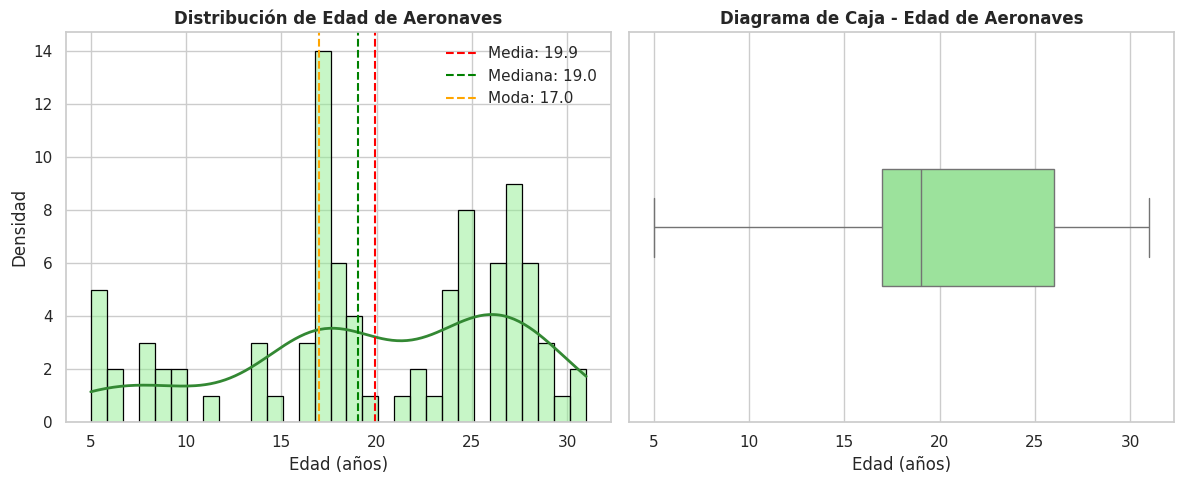


------------------------------------------------------------

ESTADÍSTICAS BÁSICAS:

Promedio: 19.9 años
Mediana: 19.0 años
Moda: 17.0 años
Desviación estándar: 7.2 años
Valores válidos: 91 registros

------------------------------------------------------------


In [ ]:
# ==============================================================
# BLOQUE 2: DISTRIBUCIÓN DE EDAD DE AERONAVES
# ==============================================================

# 1. Estilo global
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid", palette="Set2")

def graficos_edad_aeronaves(df):
    """
    Analiza cómo se distribuye la edad de las aeronaves.
    Muestra histograma con líneas de media, mediana y moda, y boxplot.
    """
    print("="*60)
    print("BLOQUE 2: DISTRIBUCIÓN DE EDAD DE AERONAVES")
    print("="*60)
    print("")

    if 'edad_aeronave' not in df.columns:
        print("No existe la columna 'edad_aeronave' en el dataset.")
        return

    # 2. Preprocesamiento
    edad = df['edad_aeronave'].dropna()

    # 3. Estadísticas básicas
    media = edad.mean()
    mediana = edad.median()
    moda = edad.mode().iloc[0] if not edad.mode().empty else np.nan
    desvio = edad.std()
    n = len(edad)

    # 4. Crear figura con dos gráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ==========================================================
    # Gráfico 1: Histograma con líneas estadísticas
    # ==========================================================
    sns.histplot(
          edad,
          bins=31,
          kde=True,
          color="lightgreen",      # color del histograma
          edgecolor="black",
          ax=axes[0]
          )

    # 5. Cambiar color y grosor de la curva KDE después de crearla
    for line in axes[0].lines:
        line.set_color("#338833")   # color de la curva de densidad
        line.set_linewidth(2)        # grosor

    # 6. Líneas de referencia
    axes[0].axvline(media, color='red', linestyle='--', linewidth=1.5, label=f"Media: {media:.1f}")
    axes[0].axvline(mediana, color='green', linestyle='--', linewidth=1.5, label=f"Mediana: {mediana:.1f}")
    axes[0].axvline(moda, color='orange', linestyle='--', linewidth=1.5, label=f"Moda: {moda:.1f}")

    axes[0].set_title("Distribución de Edad de Aeronaves", fontsize=12, fontweight="bold")
    axes[0].set_xlabel("Edad (años)")
    axes[0].set_ylabel("Densidad")
    axes[0].legend()

    # ==========================================================
    # Gráfico 2: Boxplot
    # ==========================================================
    sns.boxplot(x=edad, color="lightgreen", width=0.3, ax=axes[1])
    axes[1].set_title("Diagrama de Caja - Edad de Aeronaves", fontsize=12, fontweight="bold")
    axes[1].set_xlabel("Edad (años)")

    plt.tight_layout()
    plt.show()

    # ==========================================================
    # Estadísticas básicas
    # ==========================================================
    print("")
    print("-"*60)
    print("")
    print("ESTADÍSTICAS BÁSICAS:")
    print("")
    print(f"Promedio: {media:.1f} años")
    print(f"Mediana: {mediana:.1f} años")
    print(f"Moda: {moda:.1f} años")
    print(f"Desviación estándar: {desvio:.1f} años")
    print(f"Valores válidos: {n} registros\n")
    print("-"*60)

# EJECUTAR BLOQUE 2
graficos_edad_aeronaves(df_limpio)


## **5.3 - DISTRIBUCIÓN DE CANTIDAD DE MOTORES**

Este bloque de código analiza la distribución de configuraciones de motores en la flota aeronáutica mediante visualizaciones comparativas. La función "graficos_cantidad_motores" genera dos representaciones gráficas:

* Un gráfico de barras que muestra la frecuencia absoluta de cada configuración.

* Un gráfico circular que presenta la distribución porcentual.

Los resultados revelan una predominancia de aeronaves bimotor (89 unidades, 97.8%), mientras que las configuraciones cuatrimotor representan solo 2 aeronaves (2.2%). Esta distribución refleja la tendencia actual en la industria hacia configuraciones más eficientes en combustible y menores costos de mantenimiento, siendo la configuración bimotor el estándar predominante en la flota analizada.

BLOQUE 3: DISTRIBUCIÓN DE CANTIDAD DE MOTORES



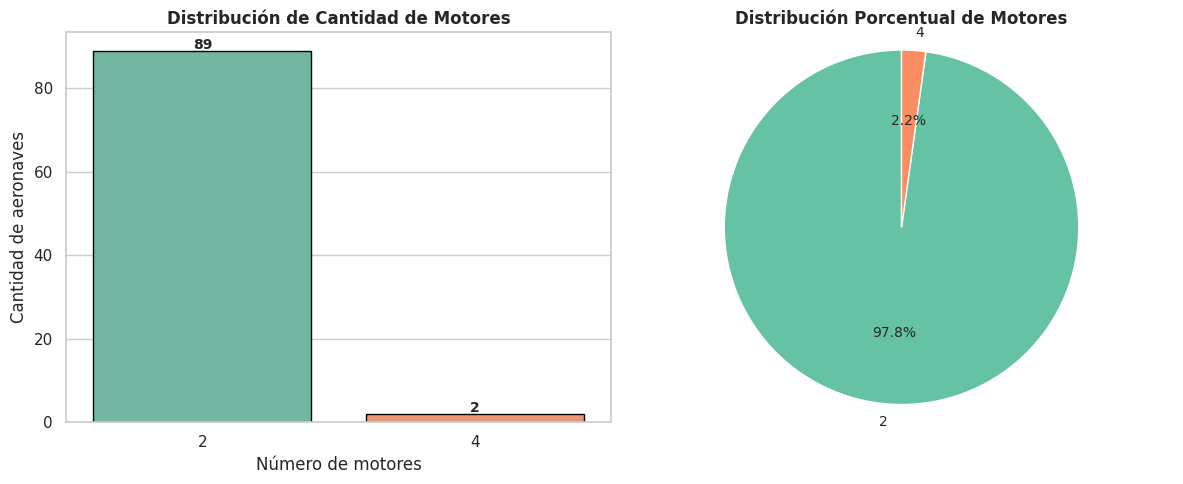


------------------------------------------------------------

ESTADÍSTICAS BÁSICAS:

Distribución de motores:
  - 2 motores: 89 aeronaves (97.8%)
  - 4 motores: 2 aeronaves (2.2%)
Configuración más común: 2 motores

------------------------------------------------------------


In [ ]:
# ==============================================================
# BLOQUE 3: DISTRIBUCIÓN DE CANTIDAD DE MOTORES
# ==============================================================

# 1. Ignorar solo los FutureWarnings de Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Estilo global
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

def graficos_cantidad_motores(df):
    """
    Analiza cómo se distribuye la cantidad de motores en las aeronaves.
    Muestra un gráfico de barras y un gráfico circular con estilo uniforme.
    """
    print("=" * 60)
    print("BLOQUE 3: DISTRIBUCIÓN DE CANTIDAD DE MOTORES")
    print("=" * 60)
    print("" * 60)

    if 'cantidad_motores' not in df.columns:
        print("No existe la columna 'cantidad_motores' en el dataset.")
        return

    # Preprocesamiento
    motores = df['cantidad_motores'].dropna()
    conteo = motores.value_counts().sort_index()

    # Figura con 2 gráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    colores = sns.color_palette("Set2", n_colors=len(conteo))

    # ==========================================================
    # Gráfico 1: Barras
    # ==========================================================
    sns.barplot(
        x=conteo.index,
        y=conteo.values,
        palette=colores,  # usar misma paleta
        ax=axes[0],
        edgecolor="black"
    )

    axes[0].set_title("Distribución de Cantidad de Motores", fontsize=12, fontweight="bold")
    axes[0].set_xlabel("Número de motores")
    axes[0].set_ylabel("Cantidad de aeronaves")

    # Etiquetas sobre las barras
    for i, val in enumerate(conteo.values):
        axes[0].text(i, val + 0.5, f"{val}", ha='center', fontsize=10, fontweight='bold')

    # ==========================================================
    # Gráfico 2: Circular
    # ==========================================================
    wedges, texts, autotexts = axes[1].pie(
        conteo.values,
        labels=conteo.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,  # misma paleta que el barplot
        textprops={'fontsize': 10}
    )
    axes[1].set_title("Distribución Porcentual de Motores", fontsize=12, fontweight="bold")
    axes[1].axis('equal')  # Circular perfecta

    plt.tight_layout()
    plt.show()

    # ==========================================================
    # Estadísticas básicas
    # ==========================================================
    print("\n" + "-"*60)
    print("")
    print("ESTADÍSTICAS BÁSICAS:\n")
    print("Distribución de motores:")
    for mot, cantidad in conteo.items():
        porcentaje = (cantidad / len(df)) * 100
        print(f"  - {mot} motores: {cantidad} aeronaves ({porcentaje:.1f}%)")
    print(f"Configuración más común: {conteo.idxmax()} motores")
    print(""*60)
    print("-"*60)

# EJECUTAR BLOQUE 3
graficos_cantidad_motores(df_limpio)


## **5.4 - DISTRIBUCIÓN DE LÍNEAS DE PRODUCCIÓN**

Este bloque de código analiza la diversidad y concentración de las líneas de producción en la flota aeronáutica. La función "analisis_lineas_produccion_bloqueA" utiliza dos visualizaciones complementarias:

* Un gráfico de barras horizontales que muestra las 10 líneas más representadas por cantidad de aeronaves.

* Un gráfico circular que presenta su distribución porcentual.

Los resultados revelan una flota diversificada con 17 líneas de producción distintas, donde predominan los modelos "Bombardier CRJ-100/2" y "ATR 42/72" (14 aeronaves cada uno), seguidos por "Boeing 737 Classic" (13 aeronaves). La alta concentración en las 10 principales líneas (90.1% del total) indica una estrategia de estandarización en la flota, mientras que la presencia de 7 líneas adicionales con menor representación sugiere cierta diversificación operativa.

BLOQUE 4: LÍNEAS DE PRODUCCIÓN



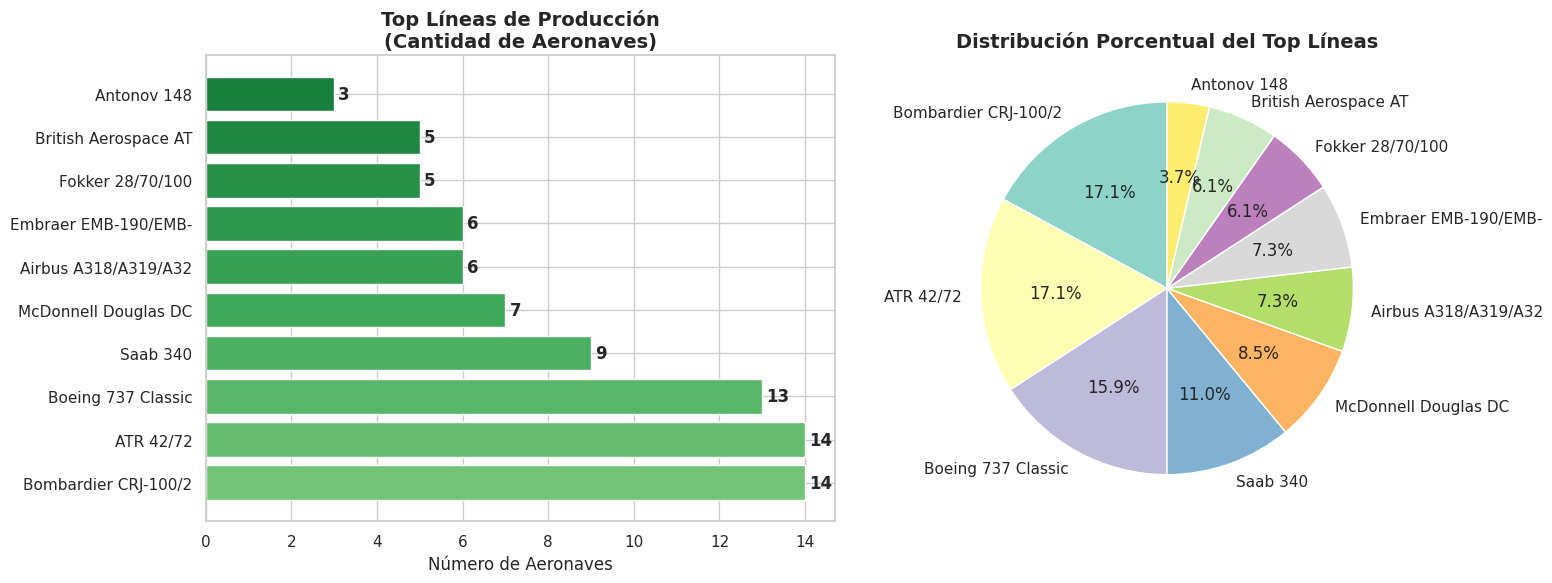


------------------------------------------------------------

ESTADÍSTICAS BÁSICAS:

Total de líneas distintas: 17
Línea más representada: Bombardier CRJ-100/2 (14 aeronaves)
Porcentaje del top 10: 90.1%

------------------------------------------------------------


In [ ]:
# ==============================================================
# BLOQUE 4: LÍNEAS DE PRODUCCIÓN
# ==============================================================

def analisis_lineas_produccion_bloqueA(df, top_n=10):
    print("="*60)
    print("BLOQUE 4: LÍNEAS DE PRODUCCIÓN")
    print("="*60)
    print(""*60)

    if 'linea_produccion' not in df.columns:
        print("Columna 'linea_produccion' no disponible")
        return {}

    # Distribución y top N
    distribucion_lineas = df['linea_produccion'].value_counts()
    top_lineas = distribucion_lineas.head(top_n)

    # Configuración de figura
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # ==========================================================
    # Gráfico 1: Barras horizontales
    # ==========================================================
    bars = axes[0].barh(range(len(top_lineas)), top_lineas.values,
                        color=plt.cm.Greens(np.linspace(0.5, 0.8, len(top_lineas))))
    axes[0].set_yticks(range(len(top_lineas)))
    axes[0].set_yticklabels(top_lineas.index)
    axes[0].set_title('Top Líneas de Producción\n(Cantidad de Aeronaves)',
                      fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Número de Aeronaves')

    # Etiquetas en las barras
    for i, (bar, valor) in enumerate(zip(bars, top_lineas.values)):
        axes[0].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                     f'{valor}', ha='left', va='center', fontweight='bold')

    # ==========================================================
    # Gráfico 2: Pie chart
    # ==========================================================
    axes[1].pie(top_lineas.values, labels=top_lineas.index,
                autopct=lambda p: f'{p:.1f}%', startangle=90,
                colors=plt.cm.Set3(np.linspace(0, 1, len(top_lineas))))
    axes[1].set_title('Distribución Porcentual del Top Líneas',
                      fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ==========================================================
    # Estadísticas básicas
    # ==========================================================
    print("")
    print("-"*60)
    print("")
    print("ESTADÍSTICAS BÁSICAS:")
    print("")
    print(f"Total de líneas distintas: {len(distribucion_lineas)}")
    print(f"Línea más representada: {top_lineas.index[0]} ({top_lineas.iloc[0]} aeronaves)")
    print(f"Porcentaje del top {top_n}: {top_lineas.sum()/len(df)*100:.1f}%")
    print(""*60)
    print("-"*60)

# EJECUTAR BLOQUE 4
analisis_lineas_produccion_bloqueA(df_limpio)


## **5.5 - DISTRIBUCIÓN DE FABRICANTES PRINCIPALES**

Este bloque de código analiza la estructura del mercado de fabricantes aeronáuticos en la flota. La función "analisis_fabricantes_bloqueB" extrae el fabricante principal de cada aeronave a partir de la primera palabra de la línea de producción y genera dos visualizaciones:

* Un gráfico de barras que muestra los 5 fabricantes más representados.

* Un panel de métricas que resume la diversidad del mercado.

Los resultados revelan un panorama competitivo con 11 fabricantes distintos operando en 17 líneas de producción diferentes. Boeing emerge como fabricante líder con 16 aeronaves, seguido por otros importantes actores. La concentración moderada en los tres principales fabricantes (49.5% de la flota) indica un mercado diversificado sin dominio absoluto de un solo jugador, reflejando un ecosistema  balanceado entre fabricantes establecidos y especializados.

BLOQUE 5: FABRICANTES PRINCIPALES



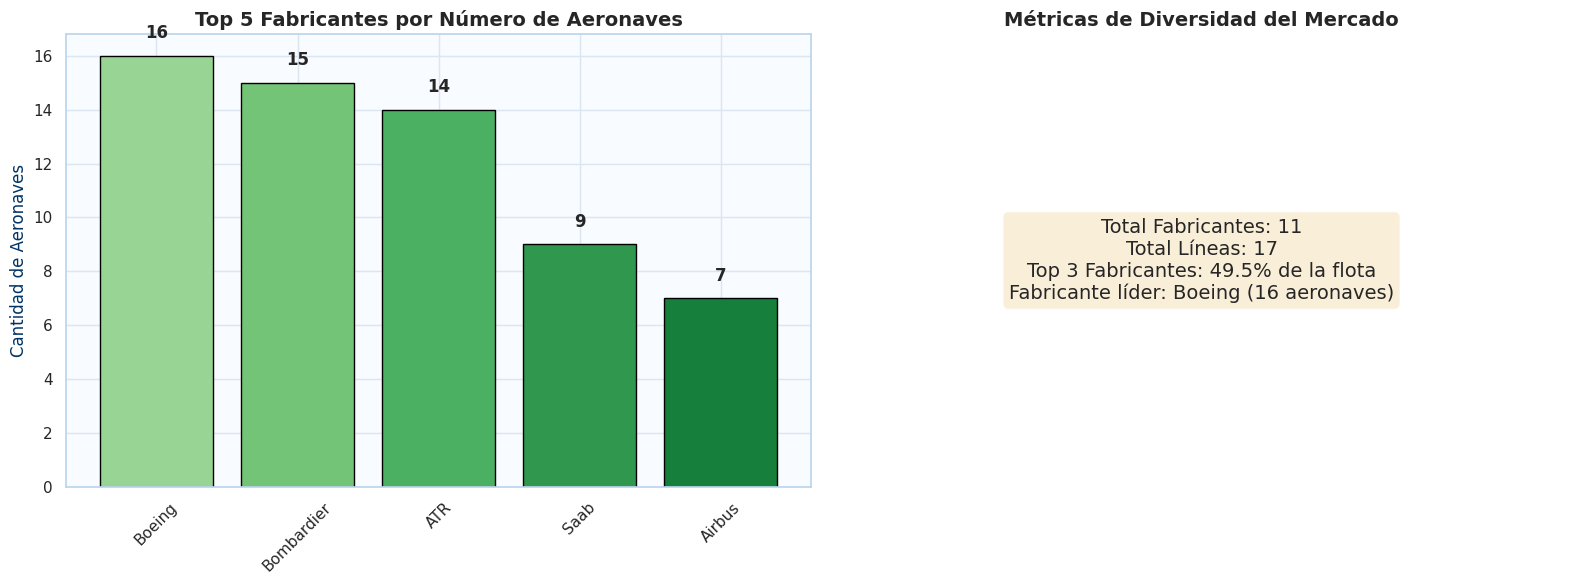


------------------------------------------------------------

ESTADÍSTICAS BÁSICAS:

Total de fabricantes distintos: 11
Total de líneas de producción: 17
Porcentaje del top 3 fabricantes: 49.5%
Fabricante líder: Boeing (16 aeronaves)

------------------------------------------------------------



In [5]:
# ==============================================================
# BLOQUE 5: FABRICANTES PRINCIPALES
# ==============================================================

def analisis_fabricantes_bloqueB(df, top_n=5):
    print("="*60)
    print("BLOQUE 5: FABRICANTES PRINCIPALES")
    print("="*60)
    print(""*60)

    if 'linea_produccion' not in df.columns:
        print("Columna 'linea_produccion' no disponible")
        return {}

    # Extraer fabricante (primer palabra de linea_produccion)
    df['fabricante'] = df['linea_produccion'].str.split().str[0]
    distribucion_fabricantes = df['fabricante'].value_counts()
    top_fabricantes = distribucion_fabricantes.head(top_n)

    # Crear figura con 2 gráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # ==========================================================
    # Gráfico 1: Barras de fabricantes
    # ==========================================================
    colores = plt.cm.Greens(np.linspace(0.4, 0.8, len(top_fabricantes)))
    axes[0].bar(range(len(top_fabricantes)), top_fabricantes.values,
                color=colores, edgecolor='black')
    axes[0].set_xticks(range(len(top_fabricantes)))
    axes[0].set_xticklabels(top_fabricantes.index, rotation=45)
    axes[0].set_title(f'Top {top_n} Fabricantes por Número de Aeronaves',
                      fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Cantidad de Aeronaves')

    # Etiquetas en las barras
    for i, valor in enumerate(top_fabricantes.values):
        axes[0].text(i, valor + 0.5, f'{valor}', ha='center', va='bottom', fontweight='bold')

    # ==========================================================
    # Gráfico 2: Métricas de diversidad mejoradas
    # ==========================================================
    total_fabricantes = len(distribucion_fabricantes)
    total_lineas = len(df['linea_produccion'].value_counts())
    cuota_top3 = distribucion_fabricantes.head(3).sum() / len(df) * 100
    fabricante_lider = distribucion_fabricantes.index[0]
    cantidad_lider = distribucion_fabricantes.iloc[0]

    texto_metricas = (
        f"Total Fabricantes: {total_fabricantes}\n"
        f"Total Líneas: {total_lineas}\n"
        f"Top 3 Fabricantes: {cuota_top3:.1f}% de la flota\n"
        f"Fabricante líder: {fabricante_lider} ({cantidad_lider} aeronaves)"
    )

    axes[1].text(0.5, 0.5, texto_metricas,
                 ha='center', va='center', transform=axes[1].transAxes,
                 fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[1].set_title('Métricas de Diversidad del Mercado',
                      fontsize=14, fontweight='bold')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # ==========================================================
    # Estadísticas básicas
    # ==========================================================
    print("\n" + "-"*60)
    print("")
    print("ESTADÍSTICAS BÁSICAS:\n")
    print(f"Total de fabricantes distintos: {total_fabricantes}")
    print(f"Total de líneas de producción: {total_lineas}")
    print(f"Porcentaje del top 3 fabricantes: {cuota_top3:.1f}%")
    print(f"Fabricante líder: {fabricante_lider} ({cantidad_lider} aeronaves)")
    print("")
    print("-"*60 + "\n")


# EJECUTAR BLOQUE 5
analisis_fabricantes_bloqueB(df_limpio)


# **6 - Conclusiones e Insights**




---

El análisis exploratorio revela una flota aeronáutica compuesta por 91 aeronaves con una estructura operativa bien definida. La calidad de datos es aceptable (80.3% de completitud global) con excelente integridad en campos críticos (100%).

---

**Composición y Antigüedad:**

La flota presenta una edad promedio de 19.9 años, con distribución relativamente simétrica (mediana: 19.0 años) y concentración en aeronaves más jóvenes (moda: 17.0 años). Se confirma que las aeronaves de la línea Boeing 737 Classic presentan la mayor antigüedad promedio, lo que sugiere necesidad de renovación prioritaria.

---

**Configuraciones Técnicas:**

Existe una predominancia de configuraciones bimotor (97.8%), alineada con tendencias modernas de eficiencia. Los motores de tipo JET (TURBOFAN) dominan la flota (61 unidades) frente a TURBOPROP (30 unidades), reflejando la transición hacia tecnologías más eficientes.

---

**Diversidad de Fabricantes:**

El mercado muestra 11 fabricantes compitiendo en 17 líneas de producción distintas. Boeing lidera con 16 aeronaves, seguido por Bombardier y ATR (14 cada uno). La concentración moderada (49.5% en top 3 fabricantes) indica un ecosistema competitivo balanceado.

---

**Estado Operativo:**

La flota mantiene alto porcentaje de aeronaves activas (73 vs 18 inactivas), con concentración en líneas de producción modernas que refleja la tendencia hacia eficiencia y sostenibilidad.

---

**Insights Estratégicos:**

* Renovación Prioritaria: La antigüedad de Boeing 737 Classic sugiere necesidad de renovación programada

* Estandarización Exitosa: La concentración en configuraciones bimotor y motores JET optimiza costos de mantenimiento

* Diversificación Controlada: Balance entre estandarización (top 10 líneas: 90.1%) y flexibilidad operativa

---

**Proyecciones Futuras:**

Este análisis sienta bases para modelos predictivos de envejecimiento de flota y estimación de reemplazo operativo, permitiendo optimizar inversiones en renovación y mantenimiento. La data disponible facilita proyecciones de vida útil residual y planificación de adquisiciones futuras.

La flota analizada demuestra madurez operativa con transición controlada hacia tecnologías más eficientes, posicionándose favorablemente frente a desafíos de sostenibilidad y eficiencia en la industria aeronáutica moderna.

---